In [1]:
import xgboost
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
import matplotlib.pyplot as plt
import sklearn
from typing import Tuple
from datetime import datetime
import copy

In [2]:
training_df = pd.read_csv('train-data-10-year.csv')
y_train = training_df['price']
X_train = training_df.drop('price', axis=1)

In [3]:
training_df = pd.read_csv('test-data-10-year.csv')
y_test = training_df['price']
X_test = training_df.drop('price', axis=1)

In [4]:
# random_state = random.getstate()[1][0]

# X_train, X_val, X_test, y_train, y_val, y_test = train_val_split(X, y, X.size, random_state)

# print(X_train)
#print(y_train)
XGB_train = xgboost.DMatrix(X_train, label=y_train)
XGB_test = xgboost.DMatrix(X_test, label=y_test)

def r2(predt: np.ndarray, dtrain: xgboost.DMatrix) -> Tuple[str, float]:
    y = dtrain.get_label()
    score = 1 - sum((y - predt)**2)/sum((y - np.mean(np.array(y)))**2)
    return 'R2', float(score)


In [5]:
plot_dict = {}

In [6]:
#n_estimators
#minchildweight[i for i in range(10)]以及max_depth[i for i in range(10)]
#gamma[0,inf]
#subsample(0.5,1]以及colsample_bytree(0,1]
#regalpha[0,inf]以及reglambda[0,inf]
#learning_rate(0,inf]
#params = {}
#params = {'learning_rate': 0.1,  'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
#                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
params = {'learning_rate': 0.1,  'max_depth': 8, 'min_child_weight': 1, 'seed': 0,
                   'subsample': 0.6, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 16}

In [ ]:
gridsearch_params = [
    (i, j)
    for i in [0]
    for j in [16]
]
gridsearch1 = 'reg_alpha'
gridsearch2 = 'reg_lambda'

In [51]:

from sklearn.metrics import r2_score
cur_params = copy.deepcopy(params)
#for i,j in gridsearch_params:
for k in gridsearch_params
    currentDateAndTime = datetime.now()
    #print("now:",i,j)
    #cur_params[gridsearch1] = i
    #cur_params[gridsearch2] = j
    cur_params = copy.deepcopy(k)
    #early_stop = xgboost.callback.EarlyStopping(rounds=20,metric_name='rmse')
    xgbcv = xgboost.cv(
        cur_params,
        XGB_train,
        nfold=5,
        custom_metric=r2,
        num_boost_round = 5000#,
        #callbacks = [early_stop]
    )
    print(xgbcv)
    plot_dict[(i,j)] = (xgbcv['test-R2-mean'],xgbcv['train-R2-mean'])
    print(xgbcv['test-R2-mean'].max())
    print("time:",datetime.now()-currentDateAndTime)

now: 0 16
      train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std  \
0        9.992286e+06    10691.104409    9.992960e+06   41363.894387   
1        9.089740e+06    15798.699496    9.091540e+06   40781.577026   
2        8.274513e+06    12948.046453    8.277775e+06   40604.431092   
3        7.540112e+06    11066.279287    7.545561e+06   40155.259484   
4        6.889092e+06    11914.685732    6.897073e+06   36188.381227   
...               ...             ...             ...            ...   
1995     4.677382e+05     4321.261982    1.513355e+06   31693.882830   
1996     4.676403e+05     4337.649314    1.513375e+06   31699.772255   
1997     4.675216e+05     4357.768948    1.513404e+06   31690.361801   
1998     4.673993e+05     4346.394044    1.513375e+06   31677.063687   
1999     4.672867e+05     4347.744029    1.513349e+06   31678.743952   

      train-R2-mean  train-R2-std  test-R2-mean  test-R2-std  
0         -2.443396      0.006104     -2.444215     0.022315  

In [29]:
#print(plot_dict)
for i,j in plot_dict:
    print(i,j)
    plt.figure(figsize=(4, 2))
    plt.plot(np.squeeze(plot_dict[(i,j)][1][-1000:]-plot_dict[(i,j)][0][-1000:]))
    plt.ylabel('r2_diff')
    plt.xlabel('iterations')
    plt.show()
    plt.figure(figsize=(4, 2))
    plt.plot(np.squeeze(plot_dict[(i,j)][1][500:]))
    plt.plot(np.squeeze(plot_dict[(i,j)][0][500:]))
    plt.ylabel('r2')
    plt.xlabel('iterations')
    plt.show()

plt.figure(figsize=(4, 2))
for i,j in plot_dict:
    if(plot_dict[(i,j)][0].max()<0.915):
        continue
    plt.plot(np.squeeze(plot_dict[(i,j)][0][300:]),label = (i,j))
    plt.legend(
    loc='upper center', bbox_to_anchor=(0.5, -0.05),
    fontsize=10,
    shadow=True,
    facecolor='#ccc',
    edgecolor='#000',
    title='test',
    title_fontsize=20)
plt.ylabel('r2')
plt.xlabel('iterations')
plt.show()

for i,j in plot_dict:
    if(plot_dict[(i,j)][0].max()<0.915):
        continue
    plt.plot(np.squeeze(plot_dict[(i,j)][0][300:] - np.squeeze(plot_dict[(i,j)][1][300:])),label = (i,j))
    plt.legend(
    loc='upper center', bbox_to_anchor=(0.5, -0.05),
    fontsize=10,
    shadow=True,
    facecolor='#ccc',
    edgecolor='#000',
    title='test',
    title_fontsize=20)
plt.ylabel('r2')
plt.xlabel('iterations')
plt.show()

ValueError: too many values to unpack (expected 2)

In [19]:

plot_list = []
class XGBLogging(xgboost.callback.TrainingCallback):
    """log train logs to file"""

    def __init__(self, epoch_log_interval=1):
        self.epoch_log_interval = epoch_log_interval

    def after_iteration(self, model, epoch, evals_log):
        if epoch == self.epoch_log_interval - 1:
            for data, metric in evals_log.items():
                plot_dict_eval[data + '-R2'] = metric["R2"]
                plot_dict_eval[data + '-rmse'] = metric["rmse"]
        # False to indicate training should not stop.
        return False

In [20]:
plot_dict_eval = {}


xgbrt = xgboost.train(params,
        dtrain = XGB_train,
        #5000,
        evals = [(XGB_test,'test'), (XGB_train,'train')],
        num_boost_round = 2000,
        custom_metric=r2,
        callbacks=[XGBLogging(epoch_log_interval=2000)]
        #feval = r2
        )
print(max(plot_dict_eval['test-R2']))
plot_list.append(plot_dict_eval)

[0]	test-rmse:10061392.72552	test-R2:-2.53701	train-rmse:9988736.40656	train-R2:-2.44093
[1]	test-rmse:9144829.44616	test-R2:-1.92194	train-rmse:9080061.94412	train-R2:-1.84336
[2]	test-rmse:8318607.24156	test-R2:-1.41780	train-rmse:8260375.94096	train-R2:-1.35317
[3]	test-rmse:7578733.07200	test-R2:-1.00684	train-rmse:7526325.42560	train-R2:-0.95353
[4]	test-rmse:6920688.86405	test-R2:-0.67347	train-rmse:6871161.07799	train-R2:-0.62823
[5]	test-rmse:6331831.78602	test-R2:-0.40081	train-rmse:6281192.24737	train-R2:-0.36062
[6]	test-rmse:5805787.72796	test-R2:-0.17772	train-rmse:5756154.02614	train-R2:-0.14266
[7]	test-rmse:5348135.31228	test-R2:0.00063	train-rmse:5301154.80792	train-R2:0.03084
[8]	test-rmse:4940663.00624	test-R2:0.14711	train-rmse:4893709.26985	train-R2:0.17409
[9]	test-rmse:4568342.32606	test-R2:0.27082	train-rmse:4518876.33396	train-R2:0.29577
[10]	test-rmse:4246008.92871	test-R2:0.37008	train-rmse:4193041.59673	train-R2:0.39366
[11]	test-rmse:3964410.79100	test-R2:0

[95]	test-rmse:1739245.73837	test-R2:0.89431	train-rmse:1455225.72281	train-R2:0.92697
[96]	test-rmse:1735483.56244	test-R2:0.89477	train-rmse:1450416.74939	train-R2:0.92745
[97]	test-rmse:1733630.47791	test-R2:0.89499	train-rmse:1447484.85488	train-R2:0.92774
[98]	test-rmse:1732890.78752	test-R2:0.89508	train-rmse:1445901.59871	train-R2:0.92790
[99]	test-rmse:1732055.98231	test-R2:0.89518	train-rmse:1443780.20298	train-R2:0.92811
[100]	test-rmse:1731533.72337	test-R2:0.89524	train-rmse:1442381.39971	train-R2:0.92825
[101]	test-rmse:1731789.63775	test-R2:0.89521	train-rmse:1441397.16171	train-R2:0.92835
[102]	test-rmse:1728119.59318	test-R2:0.89566	train-rmse:1437219.38761	train-R2:0.92876
[103]	test-rmse:1726543.95766	test-R2:0.89585	train-rmse:1434632.35098	train-R2:0.92902
[104]	test-rmse:1725241.98477	test-R2:0.89600	train-rmse:1431195.21452	train-R2:0.92936
[105]	test-rmse:1724607.16900	test-R2:0.89608	train-rmse:1429122.55542	train-R2:0.92956
[106]	test-rmse:1724226.33200	test-R2

[189]	test-rmse:1649080.74261	test-R2:0.90498	train-rmse:1280617.35262	train-R2:0.94344
[190]	test-rmse:1647569.98207	test-R2:0.90516	train-rmse:1277424.78068	train-R2:0.94372
[191]	test-rmse:1647063.28445	test-R2:0.90521	train-rmse:1276547.68338	train-R2:0.94380
[192]	test-rmse:1645972.51126	test-R2:0.90534	train-rmse:1275145.40686	train-R2:0.94392
[193]	test-rmse:1645282.78976	test-R2:0.90542	train-rmse:1273931.49252	train-R2:0.94403
[194]	test-rmse:1644968.71255	test-R2:0.90546	train-rmse:1273046.24321	train-R2:0.94411
[195]	test-rmse:1643494.27597	test-R2:0.90563	train-rmse:1271063.20719	train-R2:0.94428
[196]	test-rmse:1642687.24323	test-R2:0.90572	train-rmse:1269734.12777	train-R2:0.94440
[197]	test-rmse:1641587.27743	test-R2:0.90584	train-rmse:1268242.50306	train-R2:0.94453
[198]	test-rmse:1640395.19575	test-R2:0.90598	train-rmse:1266845.01398	train-R2:0.94465
[199]	test-rmse:1640282.79048	test-R2:0.90599	train-rmse:1266105.13240	train-R2:0.94472
[200]	test-rmse:1639738.05267	te

[283]	test-rmse:1597744.76761	test-R2:0.91081	train-rmse:1155206.90227	train-R2:0.95398
[284]	test-rmse:1597221.04818	test-R2:0.91087	train-rmse:1154336.38110	train-R2:0.95405
[285]	test-rmse:1596852.02420	test-R2:0.91091	train-rmse:1153302.25900	train-R2:0.95413
[286]	test-rmse:1596928.93911	test-R2:0.91090	train-rmse:1152219.48505	train-R2:0.95422
[287]	test-rmse:1596557.06695	test-R2:0.91094	train-rmse:1151660.48087	train-R2:0.95426
[288]	test-rmse:1596213.81604	test-R2:0.91098	train-rmse:1150635.22437	train-R2:0.95434
[289]	test-rmse:1595961.55036	test-R2:0.91100	train-rmse:1150438.05568	train-R2:0.95436
[290]	test-rmse:1595310.59820	test-R2:0.91108	train-rmse:1149346.57122	train-R2:0.95444
[291]	test-rmse:1595085.58904	test-R2:0.91110	train-rmse:1148455.52352	train-R2:0.95451
[292]	test-rmse:1594935.69781	test-R2:0.91112	train-rmse:1147407.29117	train-R2:0.95460
[293]	test-rmse:1595201.73252	test-R2:0.91109	train-rmse:1146101.84364	train-R2:0.95470
[294]	test-rmse:1594953.14494	te

[377]	test-rmse:1572326.62532	test-R2:0.91362	train-rmse:1058144.09585	train-R2:0.96139
[378]	test-rmse:1572111.40032	test-R2:0.91365	train-rmse:1057480.42178	train-R2:0.96144
[379]	test-rmse:1572198.68660	test-R2:0.91364	train-rmse:1056576.20027	train-R2:0.96150
[380]	test-rmse:1572337.62028	test-R2:0.91362	train-rmse:1055871.51194	train-R2:0.96155
[381]	test-rmse:1571923.99162	test-R2:0.91367	train-rmse:1054106.44946	train-R2:0.96168
[382]	test-rmse:1570935.25645	test-R2:0.91377	train-rmse:1052697.11531	train-R2:0.96178
[383]	test-rmse:1571010.47238	test-R2:0.91377	train-rmse:1051821.78786	train-R2:0.96185
[384]	test-rmse:1570866.80768	test-R2:0.91378	train-rmse:1051673.45638	train-R2:0.96186
[385]	test-rmse:1570509.97476	test-R2:0.91382	train-rmse:1050310.05598	train-R2:0.96196
[386]	test-rmse:1570404.51381	test-R2:0.91383	train-rmse:1049269.53309	train-R2:0.96203
[387]	test-rmse:1570332.46725	test-R2:0.91384	train-rmse:1048927.65710	train-R2:0.96206
[388]	test-rmse:1569440.09168	te

[471]	test-rmse:1550031.27150	test-R2:0.91605	train-rmse:978897.10568	train-R2:0.96695
[472]	test-rmse:1549628.92114	test-R2:0.91610	train-rmse:978034.88011	train-R2:0.96701
[473]	test-rmse:1549688.02090	test-R2:0.91609	train-rmse:977187.36688	train-R2:0.96707
[474]	test-rmse:1549607.31460	test-R2:0.91610	train-rmse:976699.55463	train-R2:0.96710
[475]	test-rmse:1549740.79458	test-R2:0.91609	train-rmse:975627.03227	train-R2:0.96717
[476]	test-rmse:1549924.30597	test-R2:0.91607	train-rmse:975194.86018	train-R2:0.96720
[477]	test-rmse:1549922.63619	test-R2:0.91607	train-rmse:974647.96214	train-R2:0.96724
[478]	test-rmse:1549883.72478	test-R2:0.91607	train-rmse:974113.20831	train-R2:0.96727
[479]	test-rmse:1549284.59845	test-R2:0.91614	train-rmse:972840.67060	train-R2:0.96736
[480]	test-rmse:1549115.87669	test-R2:0.91615	train-rmse:971968.34483	train-R2:0.96742
[481]	test-rmse:1548918.65825	test-R2:0.91617	train-rmse:971637.29384	train-R2:0.96744
[482]	test-rmse:1548811.09815	test-R2:0.916

[566]	test-rmse:1535565.98756	test-R2:0.91761	train-rmse:912434.30931	train-R2:0.97129
[567]	test-rmse:1535375.29791	test-R2:0.91763	train-rmse:911875.10066	train-R2:0.97132
[568]	test-rmse:1535237.22003	test-R2:0.91765	train-rmse:911143.32891	train-R2:0.97137
[569]	test-rmse:1534926.06417	test-R2:0.91768	train-rmse:910888.77001	train-R2:0.97139
[570]	test-rmse:1534905.38851	test-R2:0.91768	train-rmse:910609.79614	train-R2:0.97140
[571]	test-rmse:1534806.78593	test-R2:0.91770	train-rmse:910236.06919	train-R2:0.97143
[572]	test-rmse:1534788.72406	test-R2:0.91770	train-rmse:909687.99108	train-R2:0.97146
[573]	test-rmse:1534803.49052	test-R2:0.91770	train-rmse:909310.95658	train-R2:0.97149
[574]	test-rmse:1534564.29806	test-R2:0.91772	train-rmse:908725.24231	train-R2:0.97152
[575]	test-rmse:1534598.89793	test-R2:0.91772	train-rmse:908235.18085	train-R2:0.97155
[576]	test-rmse:1534745.43654	test-R2:0.91770	train-rmse:907454.27733	train-R2:0.97160
[577]	test-rmse:1534676.31539	test-R2:0.917

[661]	test-rmse:1526183.73725	test-R2:0.91862	train-rmse:857706.90313	train-R2:0.97463
[662]	test-rmse:1526557.35595	test-R2:0.91858	train-rmse:856841.79912	train-R2:0.97468
[663]	test-rmse:1526489.76763	test-R2:0.91858	train-rmse:856110.66660	train-R2:0.97472
[664]	test-rmse:1526725.05286	test-R2:0.91856	train-rmse:855614.19062	train-R2:0.97475
[665]	test-rmse:1526851.00631	test-R2:0.91855	train-rmse:854826.14811	train-R2:0.97480
[666]	test-rmse:1526878.17380	test-R2:0.91854	train-rmse:854659.74836	train-R2:0.97481
[667]	test-rmse:1527053.59593	test-R2:0.91852	train-rmse:854295.49126	train-R2:0.97483
[668]	test-rmse:1527104.28719	test-R2:0.91852	train-rmse:853651.61232	train-R2:0.97487
[669]	test-rmse:1527203.69619	test-R2:0.91851	train-rmse:853062.33985	train-R2:0.97490
[670]	test-rmse:1527143.44371	test-R2:0.91851	train-rmse:852767.46786	train-R2:0.97492
[671]	test-rmse:1526977.33779	test-R2:0.91853	train-rmse:852316.05759	train-R2:0.97495
[672]	test-rmse:1527087.50332	test-R2:0.918

[756]	test-rmse:1521539.93212	test-R2:0.91911	train-rmse:811593.51073	train-R2:0.97728
[757]	test-rmse:1521609.93846	test-R2:0.91910	train-rmse:811070.42204	train-R2:0.97731
[758]	test-rmse:1521370.17162	test-R2:0.91913	train-rmse:810591.81885	train-R2:0.97734
[759]	test-rmse:1521126.05008	test-R2:0.91916	train-rmse:810253.23385	train-R2:0.97736
[760]	test-rmse:1520938.73202	test-R2:0.91917	train-rmse:810094.58061	train-R2:0.97737
[761]	test-rmse:1520719.84307	test-R2:0.91920	train-rmse:809686.02102	train-R2:0.97739
[762]	test-rmse:1520777.06159	test-R2:0.91919	train-rmse:809123.20516	train-R2:0.97742
[763]	test-rmse:1520585.76054	test-R2:0.91921	train-rmse:808632.37692	train-R2:0.97745
[764]	test-rmse:1520447.67859	test-R2:0.91923	train-rmse:807987.38413	train-R2:0.97749
[765]	test-rmse:1520424.82422	test-R2:0.91923	train-rmse:807799.82774	train-R2:0.97750
[766]	test-rmse:1520242.84146	test-R2:0.91925	train-rmse:807406.82672	train-R2:0.97752
[767]	test-rmse:1520043.16781	test-R2:0.919

[851]	test-rmse:1515494.76875	test-R2:0.91975	train-rmse:771406.85838	train-R2:0.97948
[852]	test-rmse:1515548.13252	test-R2:0.91975	train-rmse:770987.30925	train-R2:0.97950
[853]	test-rmse:1515763.41869	test-R2:0.91973	train-rmse:770419.30742	train-R2:0.97953
[854]	test-rmse:1515732.98488	test-R2:0.91973	train-rmse:770013.82652	train-R2:0.97955
[855]	test-rmse:1515692.88823	test-R2:0.91973	train-rmse:769735.72304	train-R2:0.97957
[856]	test-rmse:1515574.49920	test-R2:0.91975	train-rmse:769361.50444	train-R2:0.97959
[857]	test-rmse:1515680.40947	test-R2:0.91973	train-rmse:768926.27006	train-R2:0.97961
[858]	test-rmse:1515506.76661	test-R2:0.91975	train-rmse:768476.62922	train-R2:0.97963
[859]	test-rmse:1515349.11538	test-R2:0.91977	train-rmse:767751.99068	train-R2:0.97967
[860]	test-rmse:1515214.09619	test-R2:0.91978	train-rmse:767221.04762	train-R2:0.97970
[861]	test-rmse:1515052.84293	test-R2:0.91980	train-rmse:766900.50197	train-R2:0.97972
[862]	test-rmse:1514939.93306	test-R2:0.919

[946]	test-rmse:1511198.85586	test-R2:0.92021	train-rmse:734960.42546	train-R2:0.98137
[947]	test-rmse:1511139.59688	test-R2:0.92021	train-rmse:734560.31727	train-R2:0.98139
[948]	test-rmse:1511094.45443	test-R2:0.92022	train-rmse:734157.91084	train-R2:0.98141
[949]	test-rmse:1510900.03845	test-R2:0.92024	train-rmse:733910.39363	train-R2:0.98142
[950]	test-rmse:1510841.84438	test-R2:0.92024	train-rmse:733525.17070	train-R2:0.98144
[951]	test-rmse:1510680.53850	test-R2:0.92026	train-rmse:732978.46248	train-R2:0.98147
[952]	test-rmse:1510914.66547	test-R2:0.92024	train-rmse:732671.00891	train-R2:0.98149
[953]	test-rmse:1511034.85972	test-R2:0.92022	train-rmse:732359.30287	train-R2:0.98150
[954]	test-rmse:1511145.21753	test-R2:0.92021	train-rmse:731942.98774	train-R2:0.98152
[955]	test-rmse:1511135.57820	test-R2:0.92021	train-rmse:731712.61729	train-R2:0.98154
[956]	test-rmse:1511211.35232	test-R2:0.92021	train-rmse:731424.21897	train-R2:0.98155
[957]	test-rmse:1511139.39880	test-R2:0.920

[1040]	test-rmse:1509165.13247	test-R2:0.92042	train-rmse:703672.74735	train-R2:0.98292
[1041]	test-rmse:1509340.30956	test-R2:0.92040	train-rmse:703296.06162	train-R2:0.98294
[1042]	test-rmse:1509491.98762	test-R2:0.92039	train-rmse:702868.17888	train-R2:0.98296
[1043]	test-rmse:1509325.85333	test-R2:0.92041	train-rmse:702641.16624	train-R2:0.98297
[1044]	test-rmse:1509458.65350	test-R2:0.92039	train-rmse:702272.06954	train-R2:0.98299
[1045]	test-rmse:1509367.66461	test-R2:0.92040	train-rmse:701985.97098	train-R2:0.98301
[1046]	test-rmse:1509477.03284	test-R2:0.92039	train-rmse:701641.56630	train-R2:0.98302
[1047]	test-rmse:1509378.15276	test-R2:0.92040	train-rmse:701266.85793	train-R2:0.98304
[1048]	test-rmse:1509305.56461	test-R2:0.92041	train-rmse:700877.40828	train-R2:0.98306
[1049]	test-rmse:1509362.24038	test-R2:0.92040	train-rmse:700635.60719	train-R2:0.98307
[1050]	test-rmse:1509358.74403	test-R2:0.92040	train-rmse:700204.24552	train-R2:0.98309
[1051]	test-rmse:1509129.42126	t

[1134]	test-rmse:1507171.06585	test-R2:0.92063	train-rmse:675319.86663	train-R2:0.98427
[1135]	test-rmse:1507211.54612	test-R2:0.92063	train-rmse:675151.48900	train-R2:0.98428
[1136]	test-rmse:1507220.42055	test-R2:0.92063	train-rmse:674889.72426	train-R2:0.98429
[1137]	test-rmse:1507217.58051	test-R2:0.92063	train-rmse:674677.51852	train-R2:0.98430
[1138]	test-rmse:1507232.58572	test-R2:0.92063	train-rmse:674471.44341	train-R2:0.98431
[1139]	test-rmse:1507187.37841	test-R2:0.92063	train-rmse:674227.90406	train-R2:0.98432
[1140]	test-rmse:1507076.97415	test-R2:0.92064	train-rmse:673978.19428	train-R2:0.98433
[1141]	test-rmse:1507165.57144	test-R2:0.92063	train-rmse:673669.68083	train-R2:0.98435
[1142]	test-rmse:1507136.29758	test-R2:0.92064	train-rmse:673448.36758	train-R2:0.98436
[1143]	test-rmse:1507201.38550	test-R2:0.92063	train-rmse:673184.92593	train-R2:0.98437
[1144]	test-rmse:1507128.79274	test-R2:0.92064	train-rmse:672969.43574	train-R2:0.98438
[1145]	test-rmse:1507131.82747	t

[1228]	test-rmse:1505828.98213	test-R2:0.92077	train-rmse:650684.64103	train-R2:0.98540
[1229]	test-rmse:1505775.33280	test-R2:0.92078	train-rmse:650420.20779	train-R2:0.98541
[1230]	test-rmse:1505873.79343	test-R2:0.92077	train-rmse:650065.48626	train-R2:0.98543
[1231]	test-rmse:1505673.48577	test-R2:0.92079	train-rmse:649574.40235	train-R2:0.98545
[1232]	test-rmse:1505643.32456	test-R2:0.92079	train-rmse:649353.56708	train-R2:0.98546
[1233]	test-rmse:1505465.79124	test-R2:0.92081	train-rmse:649155.37702	train-R2:0.98547
[1234]	test-rmse:1505265.92171	test-R2:0.92083	train-rmse:648828.84324	train-R2:0.98548
[1235]	test-rmse:1505495.59613	test-R2:0.92081	train-rmse:648613.16579	train-R2:0.98549
[1236]	test-rmse:1505596.15794	test-R2:0.92080	train-rmse:648307.90382	train-R2:0.98550
[1237]	test-rmse:1505578.59455	test-R2:0.92080	train-rmse:648105.35952	train-R2:0.98551
[1238]	test-rmse:1505598.49592	test-R2:0.92080	train-rmse:647774.03147	train-R2:0.98553
[1239]	test-rmse:1505582.89842	t

[1321]	test-rmse:1504042.77944	test-R2:0.92096	train-rmse:627710.00664	train-R2:0.98641
[1322]	test-rmse:1504036.57617	test-R2:0.92096	train-rmse:627603.26566	train-R2:0.98642
[1323]	test-rmse:1504079.53502	test-R2:0.92096	train-rmse:627412.74307	train-R2:0.98642
[1324]	test-rmse:1504046.21591	test-R2:0.92096	train-rmse:627162.35671	train-R2:0.98643
[1325]	test-rmse:1503897.29557	test-R2:0.92098	train-rmse:626830.74872	train-R2:0.98645
[1326]	test-rmse:1503874.40039	test-R2:0.92098	train-rmse:626652.10906	train-R2:0.98646
[1327]	test-rmse:1503744.83248	test-R2:0.92099	train-rmse:626443.98053	train-R2:0.98647
[1328]	test-rmse:1503593.69953	test-R2:0.92101	train-rmse:626333.85957	train-R2:0.98647
[1329]	test-rmse:1503459.19190	test-R2:0.92102	train-rmse:625965.16715	train-R2:0.98649
[1330]	test-rmse:1503431.29294	test-R2:0.92102	train-rmse:625835.53113	train-R2:0.98649
[1331]	test-rmse:1503474.11078	test-R2:0.92102	train-rmse:625711.39906	train-R2:0.98650
[1332]	test-rmse:1503559.25435	t

[1415]	test-rmse:1502967.67101	test-R2:0.92107	train-rmse:606838.04549	train-R2:0.98730
[1416]	test-rmse:1503013.33942	test-R2:0.92107	train-rmse:606633.68047	train-R2:0.98731
[1417]	test-rmse:1503117.14826	test-R2:0.92106	train-rmse:606419.16491	train-R2:0.98732
[1418]	test-rmse:1503055.63043	test-R2:0.92107	train-rmse:606207.85137	train-R2:0.98733
[1419]	test-rmse:1503028.02736	test-R2:0.92107	train-rmse:605994.32523	train-R2:0.98733
[1420]	test-rmse:1502992.26403	test-R2:0.92107	train-rmse:605755.69424	train-R2:0.98735
[1421]	test-rmse:1503123.14688	test-R2:0.92106	train-rmse:605511.80640	train-R2:0.98736
[1422]	test-rmse:1502975.88345	test-R2:0.92107	train-rmse:605397.99220	train-R2:0.98736
[1423]	test-rmse:1502972.94006	test-R2:0.92107	train-rmse:605028.88760	train-R2:0.98738
[1424]	test-rmse:1503164.69109	test-R2:0.92105	train-rmse:604794.76587	train-R2:0.98738
[1425]	test-rmse:1503153.93230	test-R2:0.92105	train-rmse:604535.22202	train-R2:0.98740
[1426]	test-rmse:1503052.62682	t

[1509]	test-rmse:1502986.31411	test-R2:0.92107	train-rmse:588208.48897	train-R2:0.98807
[1510]	test-rmse:1502989.74489	test-R2:0.92107	train-rmse:587994.05957	train-R2:0.98808
[1511]	test-rmse:1502851.46316	test-R2:0.92109	train-rmse:587793.28424	train-R2:0.98808
[1512]	test-rmse:1502742.67730	test-R2:0.92110	train-rmse:587597.19132	train-R2:0.98809
[1513]	test-rmse:1502812.77533	test-R2:0.92109	train-rmse:587488.60995	train-R2:0.98810
[1514]	test-rmse:1502806.37107	test-R2:0.92109	train-rmse:587279.06211	train-R2:0.98811
[1515]	test-rmse:1502844.86969	test-R2:0.92109	train-rmse:587114.05413	train-R2:0.98811
[1516]	test-rmse:1502776.20507	test-R2:0.92109	train-rmse:587039.76295	train-R2:0.98811
[1517]	test-rmse:1502807.29759	test-R2:0.92109	train-rmse:586825.66632	train-R2:0.98812
[1518]	test-rmse:1502821.09241	test-R2:0.92109	train-rmse:586601.18466	train-R2:0.98813
[1519]	test-rmse:1502857.03115	test-R2:0.92109	train-rmse:586344.20622	train-R2:0.98814
[1520]	test-rmse:1502808.77421	t

[1603]	test-rmse:1501818.56630	test-R2:0.92119	train-rmse:571108.58460	train-R2:0.98875
[1604]	test-rmse:1501880.14863	test-R2:0.92119	train-rmse:570972.04768	train-R2:0.98876
[1605]	test-rmse:1501858.35260	test-R2:0.92119	train-rmse:570887.79643	train-R2:0.98876
[1606]	test-rmse:1501996.25082	test-R2:0.92118	train-rmse:570646.62100	train-R2:0.98877
[1607]	test-rmse:1501870.39215	test-R2:0.92119	train-rmse:570455.22597	train-R2:0.98878
[1608]	test-rmse:1501885.50214	test-R2:0.92119	train-rmse:570264.56399	train-R2:0.98879
[1609]	test-rmse:1502000.95999	test-R2:0.92118	train-rmse:570155.58508	train-R2:0.98879
[1610]	test-rmse:1501969.93646	test-R2:0.92118	train-rmse:569891.48552	train-R2:0.98880
[1611]	test-rmse:1501875.06686	test-R2:0.92119	train-rmse:569804.99130	train-R2:0.98880
[1612]	test-rmse:1501927.09381	test-R2:0.92118	train-rmse:569681.24583	train-R2:0.98881
[1613]	test-rmse:1501905.03848	test-R2:0.92119	train-rmse:569554.76956	train-R2:0.98881
[1614]	test-rmse:1501856.00822	t

[1697]	test-rmse:1501616.90234	test-R2:0.92122	train-rmse:555740.04704	train-R2:0.98935
[1698]	test-rmse:1501485.86897	test-R2:0.92123	train-rmse:555586.63293	train-R2:0.98935
[1699]	test-rmse:1501512.33762	test-R2:0.92123	train-rmse:555406.68565	train-R2:0.98936
[1700]	test-rmse:1501475.62054	test-R2:0.92123	train-rmse:555214.64913	train-R2:0.98937
[1701]	test-rmse:1501420.24870	test-R2:0.92124	train-rmse:555135.40063	train-R2:0.98937
[1702]	test-rmse:1501460.14364	test-R2:0.92123	train-rmse:555001.34638	train-R2:0.98938
[1703]	test-rmse:1501478.70315	test-R2:0.92123	train-rmse:554884.45833	train-R2:0.98938
[1704]	test-rmse:1501462.57130	test-R2:0.92123	train-rmse:554724.22163	train-R2:0.98939
[1705]	test-rmse:1501477.18687	test-R2:0.92123	train-rmse:554557.91139	train-R2:0.98939
[1706]	test-rmse:1501524.76015	test-R2:0.92123	train-rmse:554511.99419	train-R2:0.98940
[1707]	test-rmse:1501437.45491	test-R2:0.92124	train-rmse:554345.04965	train-R2:0.98940
[1708]	test-rmse:1501491.40689	t

[1790]	test-rmse:1501257.67733	test-R2:0.92125	train-rmse:540576.30153	train-R2:0.98992
[1791]	test-rmse:1501421.05451	test-R2:0.92124	train-rmse:540433.63233	train-R2:0.98993
[1792]	test-rmse:1501578.59285	test-R2:0.92122	train-rmse:540313.74491	train-R2:0.98993
[1793]	test-rmse:1501529.24491	test-R2:0.92122	train-rmse:540179.21756	train-R2:0.98994
[1794]	test-rmse:1501542.56936	test-R2:0.92122	train-rmse:540041.53793	train-R2:0.98994
[1795]	test-rmse:1501566.75935	test-R2:0.92122	train-rmse:539885.44698	train-R2:0.98995
[1796]	test-rmse:1501567.29647	test-R2:0.92122	train-rmse:539764.66177	train-R2:0.98995
[1797]	test-rmse:1501536.34569	test-R2:0.92122	train-rmse:539643.43353	train-R2:0.98996
[1798]	test-rmse:1501368.21001	test-R2:0.92124	train-rmse:539483.21249	train-R2:0.98996
[1799]	test-rmse:1501319.26570	test-R2:0.92125	train-rmse:539362.30458	train-R2:0.98997
[1800]	test-rmse:1501364.08667	test-R2:0.92124	train-rmse:539241.25113	train-R2:0.98997
[1801]	test-rmse:1501326.39165	t

[1884]	test-rmse:1501595.06392	test-R2:0.92122	train-rmse:527426.02018	train-R2:0.99041
[1885]	test-rmse:1501417.99518	test-R2:0.92124	train-rmse:527267.41989	train-R2:0.99041
[1886]	test-rmse:1501366.58997	test-R2:0.92124	train-rmse:527083.56217	train-R2:0.99042
[1887]	test-rmse:1501435.26598	test-R2:0.92124	train-rmse:526952.01550	train-R2:0.99042
[1888]	test-rmse:1501449.89500	test-R2:0.92123	train-rmse:526859.71360	train-R2:0.99043
[1889]	test-rmse:1501463.19723	test-R2:0.92123	train-rmse:526735.96041	train-R2:0.99043
[1890]	test-rmse:1501347.42083	test-R2:0.92124	train-rmse:526629.61255	train-R2:0.99043
[1891]	test-rmse:1501338.40936	test-R2:0.92124	train-rmse:526525.26022	train-R2:0.99044
[1892]	test-rmse:1501288.58452	test-R2:0.92125	train-rmse:526387.45091	train-R2:0.99044
[1893]	test-rmse:1501251.70555	test-R2:0.92125	train-rmse:526206.14617	train-R2:0.99045
[1894]	test-rmse:1501160.31183	test-R2:0.92126	train-rmse:526082.25870	train-R2:0.99045
[1895]	test-rmse:1501092.72266	t

[1978]	test-rmse:1501380.66096	test-R2:0.92124	train-rmse:515508.45482	train-R2:0.99084
[1979]	test-rmse:1501319.09810	test-R2:0.92125	train-rmse:515413.21480	train-R2:0.99084
[1980]	test-rmse:1501311.34989	test-R2:0.92125	train-rmse:515304.91397	train-R2:0.99084
[1981]	test-rmse:1501355.49433	test-R2:0.92124	train-rmse:515119.96555	train-R2:0.99085
[1982]	test-rmse:1501421.36284	test-R2:0.92124	train-rmse:514933.19466	train-R2:0.99086
[1983]	test-rmse:1501436.87732	test-R2:0.92124	train-rmse:514767.54657	train-R2:0.99086
[1984]	test-rmse:1501499.51254	test-R2:0.92123	train-rmse:514662.86535	train-R2:0.99086
[1985]	test-rmse:1501469.94597	test-R2:0.92123	train-rmse:514544.11392	train-R2:0.99087
[1986]	test-rmse:1501458.46619	test-R2:0.92123	train-rmse:514422.42428	train-R2:0.99087
[1987]	test-rmse:1501490.31516	test-R2:0.92123	train-rmse:514290.70256	train-R2:0.99088
[1988]	test-rmse:1501474.02391	test-R2:0.92123	train-rmse:514150.98610	train-R2:0.99088
[1989]	test-rmse:1501426.93356	t

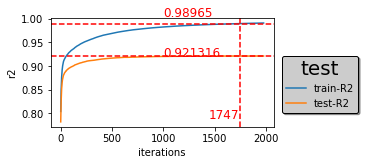

In [21]:

for i in range(len(plot_list)):
    max_r2,idx = max([(plot_list[i]['test-R2'][j],j) for j in range(2000) ])
    max_train_r2 = plot_list[i]['train-R2'][idx]
    plt.figure(figsize=(4, 2))
    plt.plot(np.squeeze(plot_list[i]['train-R2'][20:]),label = 'train-R2')
    plt.plot(np.squeeze(plot_list[i]['test-R2'][20:]),label = 'test-R2')
    plt.axhline(y=max_r2, color='r', linestyle='--')
    plt.text(x=1000, y= max_r2-0.0002, s=max_r2, color='r',fontsize = 12)
    plt.axvline(x=idx, color='r', linestyle='--')
    plt.text(x=idx-300, y= 0.79, s=idx, color='r',fontsize = 12)
    plt.axhline(y=max_train_r2, color='r', linestyle='--')
    plt.text(x=1000, y= max_train_r2+0.015, s=max_train_r2, color='r',fontsize = 12)
    plt.legend(
        #loc=5, 
        bbox_to_anchor=(1.4, 0.7),
        fontsize=10,
        shadow=True,
        facecolor='#ccc',
        edgecolor='#000',
        title='test',
        title_fontsize=20)
    plt.ylabel('r2')
    plt.xlabel('iterations')
    plt.show()

In [26]:
for i in range(2000):
    r2_ratio = (1 - plot_list[0]['test-R2'][i])/(1 - plot_list[0]['train-R2'][i])
    r2_err = (plot_list[0]['train-R2'][i]-plot_list[0]['test-R2'][i])/plot_list[0]['test-R2'][i]
    mse_ratio = plot_list[0]['test-rmse'][i]**2/plot_list[0]['train-rmse'][i]**2
    mse_err = (plot_list[0]['test-rmse'][i]**2-plot_list[0]['train-rmse'][i]**2)/plot_list[0]['test-rmse'][i]**2
    print(i,r2_ratio,mse_ratio,r2_ratio/mse_ratio,r2_err,mse_err)

0 1.0279238786303453 1.0146005582016855 1.0131315918574642 -0.03787292915676321 0.01439044960468396
1 1.0276363175960836 1.014316751068712 1.0131315651775816 -0.04088577166821018 0.014114674783421939
2 1.0274658939228012 1.014148641908606 1.013131459693258 -0.045585958576814176 0.01395125065885663
3 1.0272905970218016 1.0139749763814816 1.013132099855007 -0.05295065864290654 0.013782368112626682
4 1.0277897710697232 1.0144680892476223 1.013131691339824 -0.06718606388080882 0.014261748990401904
5 1.029533486449242 1.0161891777591092 1.0131317169895073 -0.10025722975282504 0.015931263699156414
6 1.0306791579334276 1.0173197903785107 1.0131319253604083 -0.19725299767613286 0.017024922293182268
7 1.0311692921388544 1.017803170852402 1.0131323242737182 47.72195892575039 0.01749176202456908
8 1.0326659450349072 1.0192814846976501 1.0131312699565296 0.18338714611018594 0.018916741829534522
9 1.0354329758275338 1.0220128761121203 1.0131310475915583 0.09214005080940565 0.021538746356954366
10 1

458 2.5009947441874316 2.468556479227215 1.013140580429568 0.05519811656587768 0.5949049542050376
459 2.506071067198379 2.4735725482625637 1.0131382922076178 0.05526042514067069 0.5957264319162988
460 2.5101213367915807 2.4776112636196217 1.0131215391410773 0.05531102213030529 0.5963854319345206
461 2.5122802829090696 2.4796985839734957 1.0131393787721428 0.05533316736112934 0.5967251800428143
462 2.5154676151478053 2.482830020477513 1.0131453198169464 0.055362290356394186 0.5972338050722965
463 2.5165006133500896 2.4838980052869783 1.0131255824489236 0.05534064643063422 0.5974069797264221
464 2.519592265027731 2.486937715210453 1.013130425268618 0.05533653798914581 0.5978990571883395
465 2.5201752017520214 2.487533175792759 1.0131222474847434 0.05531907925261606 0.597995311286127
466 2.5219689461513033 2.489257719918676 1.0131409560251141 0.055322665513860926 0.5982738179345005
467 2.5252865609675355 2.4925514550060464 1.0131331715924035 0.05534450724950924 0.5988046714174756
468 2.52

958 4.330456962987071 4.274398484349139 1.0131149397612769 0.06668825601196247 0.7660489531657998
959 4.335795763172177 4.27964503481141 1.013120417208443 0.06673926131683208 0.7663357610582611
960 4.340382733500052 4.284202372184493 1.013113377108494 0.06677403894744739 0.7665843223250667
961 4.345270490911071 4.288891955271225 1.013145245025479 0.06679925230394716 0.7668395449386505
962 4.3486573342774655 4.292293858841816 1.0131313179594041 0.06681207568659035 0.7670243387600147
963 4.350713740873926 4.294230233595754 1.0131533486109512 0.06683605989043051 0.7671293932550388
964 4.356367602945189 4.300002904164637 1.013108060630834 0.06688105759428602 0.7674420175317834
965 4.35792230467045 4.301556975492012 1.0131034714870866 0.06688634624747866 0.7675260363404532
966 4.3623307121013575 4.305797692597572 1.013129511310059 0.06691648996812367 0.7677549965435727
967 4.366792411568542 4.310079606575455 1.013158180398006 0.06692771758681142 0.7679857238658886
968 4.372043363994757 4.31

1458 6.40282513395029 6.319647411532375 1.0131617663140713 0.07225038811025582 0.8417633239830508
1459 6.40630330598654 6.323038887150398 1.0131684179588634 0.07225565934089803 0.841848197069895
1460 6.41079411525647 6.327690647433256 1.013133301302731 0.07226900061663537 0.8419644613306694
1461 6.415812591508034 6.332482512635435 1.0131591486761042 0.0722834276384069 0.8420840487115973
1462 6.422372384596575 6.3388602063427975 1.0131746363755134 0.07230701085859076 0.842242932096944
1463 6.42549898167004 6.342304580420482 1.0131173771607231 0.07230056224603115 0.842328606688627
1464 6.432159165035846 6.348975765674322 1.013101861218506 0.07232530973297598 0.8424942798795216
1465 6.439086087311289 6.355715977215791 1.0131173435682725 0.07236651398507629 0.8426613140699116
1466 6.441025222430817 6.357373002599253 1.013158299787878 0.07236852819102564 0.8427023238071537
1467 6.445560728579595 6.362152152509612 1.0131101196687164 0.07238187055077318 0.8428204833791124
1468 6.4534379854468

1875 8.171612367711113 8.065871654749712 1.0131096448700785 0.07502914543626969 0.8760208390606941
1876 8.17585383577286 8.070230981173776 1.0130879592970117 0.07503457289181344 0.8760878093411703
1877 8.181969256335709 8.076130245541167 1.0131051639308288 0.07506100579229372 0.876178321845156
1878 8.187071294949053 8.08134952860864 1.0130821920232689 0.07506751886620402 0.8762582912099127
1879 8.19440399417515 8.087950699658355 1.0131619613508884 0.0750820380387291 0.8763592859137679
1880 8.197065862033059 8.091152492572919 1.0130900226583741 0.07508646161929096 0.8764082124372361
1881 8.203352769679347 8.097018855165514 1.0131324770777823 0.07509756137275234 0.8764977557929178
1882 8.206228517862744 8.099679471248963 1.0131547238371583 0.07510431909267357 0.8765383243189251
1883 8.20837674515524 8.102142615900599 1.0131118562448105 0.07510290746144223 0.8765758580899968
1884 8.211590577444245 8.10555133800517 1.013082298170376 0.07510491544889486 0.8766277630848851
1885 8.21474760116

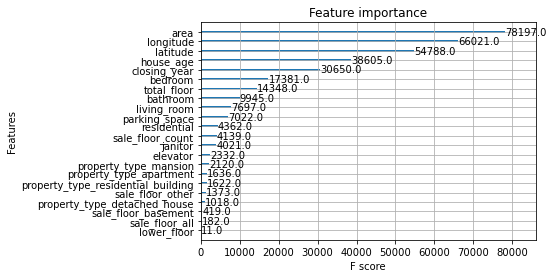

In [76]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import plot_importance
from matplotlib import pyplot


# plot feature importance
plot_importance(xgbrt)
pyplot.show()

In [ ]:
from graphviz import Digraph
from xgboost import plot_tree
import matplotlib.pyplot as plt

# 創建呈現在每一棵樹上的feature name
def create_feature_map(features):
    outfile = open("xgb.fmap", "w")
    i = 0
    for feat in features:
        outfile.write("{0}\t{1}\tq\t".format(i, feat))
        i = i+1
    outfile.close

create_feature_map(X_train.columns)
plot_tree(xgb, # 引入上面訓練好的xgb model 
          num_trees=0, # 第幾棵樹
          fmap="xgb.fmap") # 引入feature name

fig = plt.gcf()
fig.set_size_inches(570, 380)

plt.show()


In [4]:
# def train_val_split(X, y, val_size, random_state):
#     # TODO: implement your own train_val_split
    
    
#     X_train = X.sample(frac = 0.9,random_state = random_state)
#     X_temp = X.drop(X_train.index)
#     y_train = y.sample(frac = 0.9,random_state = random_state)
#     y_temp = y.drop(y_train.index)
    
#     X_val = X_temp.sample(frac = 0.5,random_state = random_state)
#     X_test = X_temp.drop(X_val.index)
#     y_val = y_temp.sample(frac = 0.5,random_state = random_state)
#     y_test = y_temp.drop(y_val.index) 
#     return X_train, X_val, X_test, y_train, y_val, y_test

In [22]:
# xgb = xgboost.XGBRegressor(**params)
# xgb.fit(X_train,y_train, eval_set=[(X_test, y_test)],verbose=False)
# score = xgb.score(X_test,y_test)
# predictions = xgb.predict(X_test)
# mse = ((predictions - y_test)**2).sum()
# print("mape = ",abs((predictions - y_test)/y_test).sum())
# print("r2 = ",score)
# print("sqrt(mse) = ",math.sqrt(mse/len(predictions)))

mape =  962.360937785828
r2 =  0.8711603068471903
sqrt(mse) =  1938565.195287849


In [49]:
# for i in range(len(grid.cv_results_['rank_test_score'])):
#     print('{:3d}'.format(grid.cv_results_['rank_test_score'][i]),end = '')
#     if grid.cv_results_['rank_test_score'][i] < 10:
#         print('_',end = '')
#     else:
#         print(' ',end = '')
#     if i%9 == 8:
#         print()

 33  32  31  27   8_ 28  15   6_  3_ 22  10  26   7_ 18   2_ 14  29  23  25  17   5_ 11  19   1_  4_ 30   9_ 13  12  21  24  20 
 16 

In [7]:


#for grid search cv
# params = {'learning_rate': 0.1, 'n_estimators': 16, 'max_depth': 10, 'min_child_weight': 1, 'seed': 0,
#                     'subsample': 0.87, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 16, 'reg_lambda': 1,"early_stopping_rounds":20}

# xgb = xgboost.XGBRegressor(**params)



In [78]:
#old grid search cv
# grid = sklearn.model_selection.GridSearchCV(estimator=xgb, param_grid=cv_params, scoring='r2', verbose=4,cv = cv)

# grid.fit(X_train, y_train,
#         eval_set=[(X_train,y_train)],
#         verbose=False)
# print('参数的最佳取值：{0}'.format(grid.best_params_))
# print('最佳模型得分:{0}'.format(grid.best_score_))
# print(grid.cv_results_['rank_test_score'])
# print(grid.cv_results_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END .....................learning_rate=1;, score=nan total time=   0.0s
[CV 2/2] END ..................learning_rate=1;, score=-1.910 total time=   0.0s
[CV 1/2] END .....................learning_rate=2;, score=nan total time=   0.0s
[CV 2/2] END ..................learning_rate=2;, score=-0.209 total time=   0.0s


C:\Users\chuang\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\chuang\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\chuang\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


参数的最佳取值：{'learning_rate': 1}
最佳模型得分:nan
[1 2]
{'mean_fit_time': array([0.04458737, 0.04631114]), 'std_fit_time': array([0.00203395, 0.00075769]), 'mean_score_time': array([0.00200081, 0.00150001]), 'std_score_time': array([0.0010004 , 0.00050032]), 'param_learning_rate': masked_array(data=[1, 2],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 1}, {'learning_rate': 2}], 'split0_test_score': array([nan, nan]), 'split1_test_score': array([-1.91016906, -0.20859275]), 'mean_test_score': array([nan, nan]), 'std_test_score': array([nan, nan]), 'rank_test_score': array([1, 2])}
